In [1]:
import numpy as np
import pandas as pd
import sklearn
import re
import graphviz
from sklearn import tree
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\vishesh.a.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
tdf = pd.read_csv("train.csv")
final_test = pd.read_csv("test.csv")
final_test['Survived']=0
tdf = tdf.append(final_test)
#tdf[tdf['PassengerId'] == 891]
#tdf[:891]
#tdf[891:]

In [3]:
#Gender dummy
tdf['male'] = np.where(tdf['Sex'] == 'male',1,0)
tdf['female'] = np.where(tdf['Sex'] == 'female',1,0)

#Ticket class dummy
tdf['Pclass_1'] = np.where(tdf['Pclass'] == 1,1,0)
tdf['Pclass_2'] = np.where(tdf['Pclass'] == 2,1,0)
tdf['Pclass_3'] = np.where(tdf['Pclass'] == 3,1,0)

#Imputing values for embarked
tdf['Embarked'].fillna(value='S',inplace=True)

#A = tdf.loc[tdf['Survived']==1,'Age'].mean()
#B = tdf.loc[tdf['Survived']==0,'Age'].mean()
#Imputing value for Age
tdf['Age'].fillna(value=30,inplace=True)

#tdf[tdf['Survived']==1]['Age'].fillna(value=int(A),inplace=True)
#tdf[tdf['Survived']==0]['Age'].fillna(value=int(B),inplace=True)

#Imputing 1 Fare value in test data set
tdf['Fare'].fillna(value=33,inplace=True)

#Embarked dummy
tdf['Embarked_S'] = np.where(tdf['Embarked'] == 'S',1,0)
tdf['Embarked_C'] = np.where(tdf['Embarked'] == 'C',1,0)
tdf['Embarked_Q'] = np.where(tdf['Embarked'] == 'Q',1,0)

#Name dummies
#tdf['Title'] = tdf['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
#x = dict(tdf['Title'].value_counts())
#n = pd.get_dummies(tdf['Title'],prefix="Title")
#tdf = tdf.join(n)

In [4]:
#tdf[tdf['Survived']==1]['Age']
tdf.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'male', 'female',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S', 'Embarked_C',
       'Embarked_Q'],
      dtype='object')

In [5]:
#Percentage of survival by socio-economic status
#Higher proportion of pessengers from upper class survived than the other two
tdf.loc[tdf['Pclass']==3,'Survived'][:891].value_counts(normalize=True)

0    0.832158
1    0.167842
Name: Survived, dtype: float64

In [6]:
tdf[:891]['Fare'].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [7]:
cols=['Age','SibSp','Parch','Fare','male','female','Pclass_1','Pclass_2','Pclass_3','Embarked_S','Embarked_C','Embarked_Q']
X = tdf[:891][cols]
y = tdf[:891]['Survived']

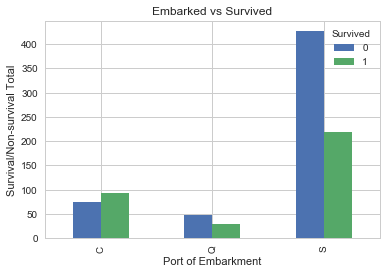

In [8]:
%matplotlib inline
pd.crosstab(tdf[:891]['Embarked'],tdf[:891]['Survived']).plot(kind='bar')
plt.title('Embarked vs Survived')
plt.xlabel('Port of Embarkment')
plt.ylabel('Survival/Non-survival Total')
plt.savefig('survival_by_class')

In [9]:
tdf[:891].groupby('Survived').mean()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,male,female,Pclass_1,Pclass_2,Pclass_3,Embarked_S,Embarked_C,Embarked_Q
Survived,,,,,,,,,,,,,,
0,30.483607,22.117887,0.329690,447.016393,2.531876,0.553734,0.852459,0.147541,0.145719,0.176685,0.677596,0.777778,0.136612,0.085610
1,28.595526,48.395408,0.464912,444.368421,1.950292,0.473684,0.318713,0.681287,0.397661,0.254386,0.347953,0.640351,0.271930,0.087719


In [10]:
# Train test split --random
#train,test = train_test_split(tdf,test_size=0.25, random_state=44)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12)

In [11]:
#Training the Logistic regression model
from sklearn import datasets
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#rfe = RFE(logreg,18)
#rfe = rfe.fit(X_train,y_train)
#print(rfe.support_)
#print(rfe.ranking_)
#logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#import statsmodels.api as sm
#logit_model = sm.Logit(y_train,X_train)
#result = logit_model.fit()
#print(result.summary())

In [13]:
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))

0.816143497758


In [14]:
final_y_pred = logreg.predict(tdf[891:][cols])

In [15]:
finalDF = pd.DataFrame(final_y_pred, tdf[891:]['PassengerId'])
finalDF.rename(columns={0:'Survived'},inplace=True)
finalDF.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [16]:
finalDF.to_csv('LogPred.csv')